In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"D:\PFM\Dataset\SpotifyFeatures.csv")
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60.0,0.1840,0.619,257560.0,0.5390,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,04-04-2023,0.4240
1,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14.0,0.8690,0.193,395293.0,0.1070,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,04-04-2023,0.0377
2,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12.0,0.9660,0.255,90560.0,0.0456,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,04-04-2023,0.0349
3,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12.0,0.9730,0.301,NaN,0.1050,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,04-04-2023,0.2470
4,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61.0,0.1840,0.619,257560.0,0.5390,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,04-04-2023,0.4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,SOHN,Red Lines,5nNRGtgS9d1vcxFCZuAA8r,47.0,0.7210,0.672,236630.0,0.3890,0.645000,A,0.1020,-10.369,Minor,0.0450,140.012,01-04-2023,0.2350
232721,Soul,Fantasia,I Nominate U,1mbvjMWmoRP8hoiouBnBw3,39.0,0.3190,0.427,274320.0,0.5960,0.000000,F#,0.1120,-5.660,Minor,0.1650,92.430,01-04-2023,0.4330
232722,Soul,IDER,Body Love,4heNDDww6hPUZYqU79AikG,41.0,0.9000,0.768,221684.0,0.2560,0.000890,G#,0.1000,-13.998,Minor,0.0606,142.585,01-04-2023,0.2420
232723,Soul,Sofi de la Torre,Voicebreaks,4832iVETghMVt43wwsac3d,43.0,0.8390,0.452,200000.0,0.2290,0.000000,A#,0.1260,-12.829,Major,0.1220,95.618,01-04-2023,0.1650


In [27]:
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [28]:
# Convert milliseconds to seconds and create a new 'duration' column

if 'duration_ms' in df.columns:
    if df['duration_ms'].isnull().any():
        print("Warning: 'duration_ms' column contains NaN values. Handling missing values.")
        df['duration_ms'].fillna(0, inplace=True)
    
    df["duration"] = df["duration_ms"].apply(lambda x: round(x / 1000))
    df.drop("duration_ms", inplace=True, axis=1)
else:
    print("'duration_ms' column not found in DataFrame.")


In [29]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60.0,0.1840,0.619,0.5390,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,04-04-2023,0.4240,258
1,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14.0,0.8690,0.193,0.1070,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,04-04-2023,0.0377,395
2,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12.0,0.9660,0.255,0.0456,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,04-04-2023,0.0349,91
3,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12.0,0.9730,0.301,0.1050,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,04-04-2023,0.2470,0
4,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61.0,0.1840,0.619,0.5390,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,04-04-2023,0.4240,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,SOHN,Red Lines,5nNRGtgS9d1vcxFCZuAA8r,47.0,0.7210,0.672,0.3890,0.645000,A,0.1020,-10.369,Minor,0.0450,140.012,01-04-2023,0.2350,237
232721,Soul,Fantasia,I Nominate U,1mbvjMWmoRP8hoiouBnBw3,39.0,0.3190,0.427,0.5960,0.000000,F#,0.1120,-5.660,Minor,0.1650,92.430,01-04-2023,0.4330,274
232722,Soul,IDER,Body Love,4heNDDww6hPUZYqU79AikG,41.0,0.9000,0.768,0.2560,0.000890,G#,0.1000,-13.998,Minor,0.0606,142.585,01-04-2023,0.2420,222
232723,Soul,Sofi de la Torre,Voicebreaks,4832iVETghMVt43wwsac3d,43.0,0.8390,0.452,0.2290,0.000000,A#,0.1260,-12.829,Major,0.1220,95.618,01-04-2023,0.1650,200


In [30]:
df.isnull().sum()

genre                0
artist_name          0
track_name           0
track_id             0
popularity           6
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness            24
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
duration             0
dtype: int64

In [28]:
df.fillna('mean')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60.0,0.184000,0.619,257560.0,0.5390,0.000000,C,0.2880,-6.9,Major,0.3870,145.618,04-04-2023,0.4240
1,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14.0,0.869000,0.193,395293.0,0.1070,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,04-04-2023,0.0377
2,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12.0,0.966000,0.255,90560.0,0.0456,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,04-04-2023,0.0349
3,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12.0,0.973000,0.301,mean,0.1050,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,04-04-2023,0.2470
4,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61.0,0.184000,0.619,257560.0,0.5390,0.000000,C,0.2880,-6.9,Major,0.3870,145.618,04-04-2023,0.4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Alternative,Santigold,L.E.S. Artistes,4dmCLAZbWYT0qtcG7GVMdb,50.0,0.034800,0.869,204907.0,0.7960,0.000010,E,0.1110,-2.001,Major,0.0340,117.990,04-04-2023,0.7260
9996,Alternative,Joe Hertz,Stay Lost - Cabu Remix,3xy8karhdpkltgdwj9FGbQ,58.0,0.047100,0.572,226909.0,0.4980,0.000005,D,0.2470,-10.484,Minor,0.4310,109.192,04-04-2023,0.5490
9997,Alternative,Default,It Only Hurts,1k0FCgVwb1jZR57ESOWUVa,54.0,0.000593,0.522,222707.0,0.7770,0.258000,F,0.2860,-4.047,Major,0.0274,97.903,04-04-2023,0.5020
9998,Alternative,Shinedown,Adrenaline,5oJrV0mGkw9dilk96X3W0c,51.0,0.000052,0.467,206227.0,0.9860,0.000092,A,0.2910,-2.69,Major,0.0634,159.935,04-04-2023,0.4000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             1000 non-null   object 
 1   artist_name       1000 non-null   object 
 2   track_name        1000 non-null   object 
 3   track_id          1000 non-null   object 
 4   popularity        994 non-null    float64
 5   acousticness      1000 non-null   float64
 6   danceability      1000 non-null   float64
 7   duration_ms       989 non-null    float64
 8   energy            1000 non-null   float64
 9   instrumentalness  1000 non-null   float64
 10  key               1000 non-null   object 
 11  liveness          1000 non-null   float64
 12  loudness          976 non-null    float64
 13  mode              1000 non-null   object 
 14  speechiness       1000 non-null   float64
 15  tempo             1000 non-null   float64
 16  time_signature    1000 non-null   object 
 

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,9994.0,39.488093,19.070792,0.000000,27.000000,41.000000,55.000000,84.000
acousticness,10000.0,0.458075,0.378021,0.000001,0.057375,0.411000,0.853000,0.996
danceability,10000.0,0.494014,0.182913,0.058200,0.375000,0.522500,0.622000,0.971
duration_ms,9989.0,218520.546501,124361.565960,15509.000000,171027.000000,209580.000000,250001.000000,3815787.000
energy,10000.0,0.532624,0.286472,0.000243,0.294000,0.570000,0.780000,0.998
instrumentalness,10000.0,0.131502,0.296680,0.000000,0.000000,0.000009,0.007072,0.999
liveness,10000.0,0.244985,0.232635,0.019300,0.101000,0.135000,0.301000,0.987
loudness,9976.0,-10.765618,6.969576,-45.337000,-14.088250,-8.440000,-5.640000,0.948
speechiness,10000.0,0.180407,0.271853,0.022400,0.037100,0.050300,0.159000,0.965
tempo,10000.0,115.678529,30.966536,32.244000,90.017500,114.033000,135.819250,216.029


In [46]:
#To check the ID and Name of Artist of 100th song :

print("ID of 100th song :")
print(df[["track_id"]].iloc[100])
print(" ")
print("The name of artist :")
print(df[["artist_name"]].iloc[100])

ID of 100th song :
track_id    2XEsLZrgYIAEa2YNDiqPYI
Name: 100, dtype: object
 
The name of artist :
artist_name    Buck Owens
Name: 100, dtype: object


In [51]:
#Count of Major and Minor mode :

mode_counts = df['mode'].value_counts()
print("Count of Major and Minor in 'mode' column:")
print(mode_counts)

Count of Major and Minor in 'mode' column:
Major    151744
Minor     80981
Name: mode, dtype: int64


In [31]:
#Sorting of data by popularity :

most_popular = df.query('popularity>90', inplace=False).sort_values('popularity',ascending=False)
most_popular

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
100506,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100.0,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,04-04-2023,0.319,179
13495,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100.0,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,04-04-2023,0.319,179
13494,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99.0,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,04-04-2023,0.335,190
82231,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99.0,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,04-04-2023,0.385,150
100505,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99.0,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,04-04-2023,0.385,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100527,Pop,Cardi B,Please Me,0PG9fbaaHFHfre2gUVo7AN,91.0,0.0642,0.747,0.570,0.000000,C#,0.0832,-6.711,Major,0.0810,133.992,04-04-2023,0.650,201
82242,Rap,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),1wJRveJZLSb1rjhnUHQiv6,91.0,0.0153,0.581,0.662,0.000000,A,0.1110,-5.239,Major,0.3030,93.023,04-04-2023,0.434,189
13498,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91.0,0.4510,0.747,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,04-04-2023,0.470,182
82240,Rap,Juice WRLD,Robbery,44ShclXTOOnYtt5CnCDeGV,91.0,0.3420,0.708,0.691,0.000000,D,0.2220,-5.179,Major,0.0442,79.990,04-04-2023,0.535,241


In [32]:
#10 Least popular songs

least_popular_songs = df.sort_values('popularity',ascending=True).head(10)
least_popular_songs


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
72530,Children's Music,Renee & Jeremy,Share,3oen1LfoTIQIodmRF7ys8G,0.0,0.2030,0.747,0.6590,0.000000,G#,0.0580,-5.898,Major,0.0328,112.002,04-04-2023,0.973,167
176618,Movie,Jean Claude Corbel,Entre deux eaux,3bHpvmkOBlVKhhGDBwLVfH,0.0,0.5410,0.474,0.3050,0.000000,C,0.5220,-13.282,Major,0.0967,79.448,04-04-2023,0.621,194
176616,Movie,Chorus,Nephelococcygia (Cloud-Cuckooland),3S16UM2l4UI2pkyaGb0Vsm,0.0,0.8400,0.847,0.8560,0.000631,C,0.1380,-4.884,Major,0.0447,130.164,04-04-2023,0.783,135
72816,Children's Music,Children Songs Company,Bohemia - Instrumental,1EueIjxwV6oAybNa4godlK,0.0,0.2230,0.520,0.6260,0.421000,A,0.0660,-9.091,Major,0.0343,121.291,04-04-2023,0.420,231
176610,Movie,Chorus,Pragma Kako,3Co4H3B4SGzaEpWfPb93Zi,0.0,0.4740,0.522,0.6520,0.000001,F,0.6770,-5.816,Minor,0.0361,73.482,04-04-2023,0.532,97
118506,Classical,Carl Maria von Weber,"Clarinet Concerto No. 1 in F Minor, Op. 73, J....",4fttXnPN4dd84PeTvyn2kW,0.0,0.9730,0.416,0.0735,0.710000,F,0.0781,-20.723,Major,0.0411,112.006,04-04-2023,0.222,401
176609,Movie,Chorus,Ye Pakistan Hamara,3ATHMseO9I0T3N57yEzN80,0.0,0.6680,0.622,0.4500,0.000000,B,0.1590,-11.152,Major,0.0317,91.297,04-04-2023,0.915,211
176608,Movie,Les Hérissons,Le taxi de Fernand,3A8wVUaMaH9sIaGhcJzU9z,0.0,0.5280,0.940,0.6230,0.000003,D,0.1120,-5.434,Major,0.0423,130.006,04-04-2023,0.804,170
176607,Movie,Idoles De La Musique,L'Homme Pressé,38YNzLnKtXIMHCDGYNvLvO,0.0,0.0257,0.673,0.6560,0.000000,C,0.0686,-6.693,Major,0.0315,102.157,04-04-2023,0.760,222
72817,Children's Music,Children Songs Company,Pimp - Instrumental,1K6blDNpQOFmJrXwGV5V02,0.0,0.0822,0.672,0.6290,0.666000,D#,0.0694,-11.021,Major,0.2050,84.976,04-04-2023,0.981,256


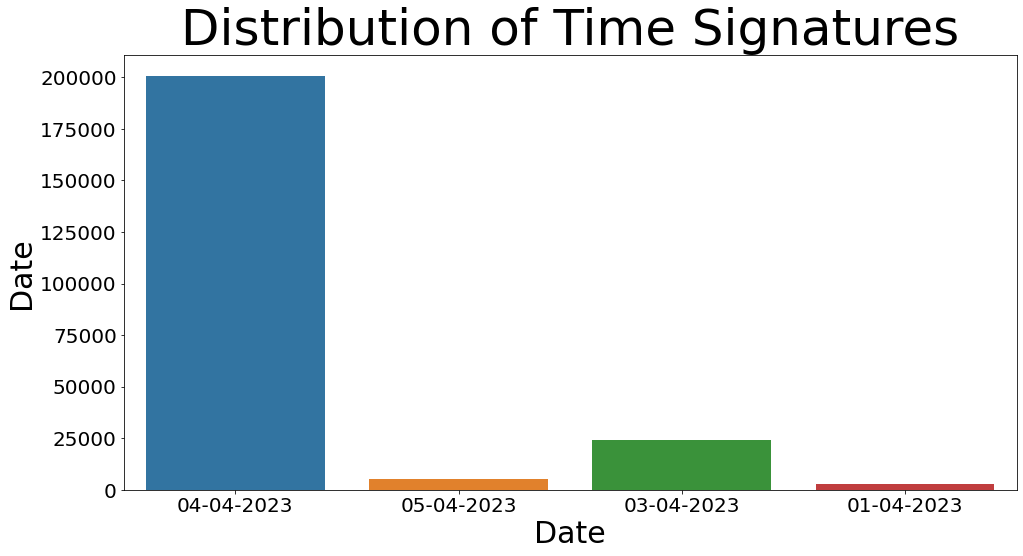

In [76]:
#Number of songs played by Date :

plt.figure(figsize=(16, 8))
sns.countplot(x='time_signature', data=df)
plt.title('Distribution of Time Signatures',fontsize=50)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Date',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


Interpretation:
Most of the songs are played on 04-04-2023

In [33]:
#Most Popular Artist :

popular_artist = df.loc[df['popularity'].idxmax()]['artist_name']
print(f"The most popular artist is: {popular_artist}")

The most popular artist is: Ariana Grande


In [37]:
# Top 5 popular artists

top_5_popular_artists = df.nlargest(5, 'popularity')['artist_name'].tolist()

print("Top 5 Popular Artists:")
for i, artist in enumerate(top_5_popular_artists, start=1):
    print(f"{i}. {artist}")


Top 5 Popular Artists:
1. Ariana Grande
2. Ariana Grande
3. Ariana Grande
4. Post Malone
5. Ariana Grande


In [34]:
# Top 5 unique popular artists
top_5_unique_popular_artists = df.groupby('artist_name')['popularity'].max().nlargest(5).index.tolist()

print("Top 5 Unique Popular Artists:")
for i, artist in enumerate(top_5_unique_popular_artists, start=1):
    print(f"{i}. {artist}")


Top 5 Unique Popular Artists:
1. Ariana Grande
2. Post Malone
3. Daddy Yankee
4. Ava Max
5. Halsey


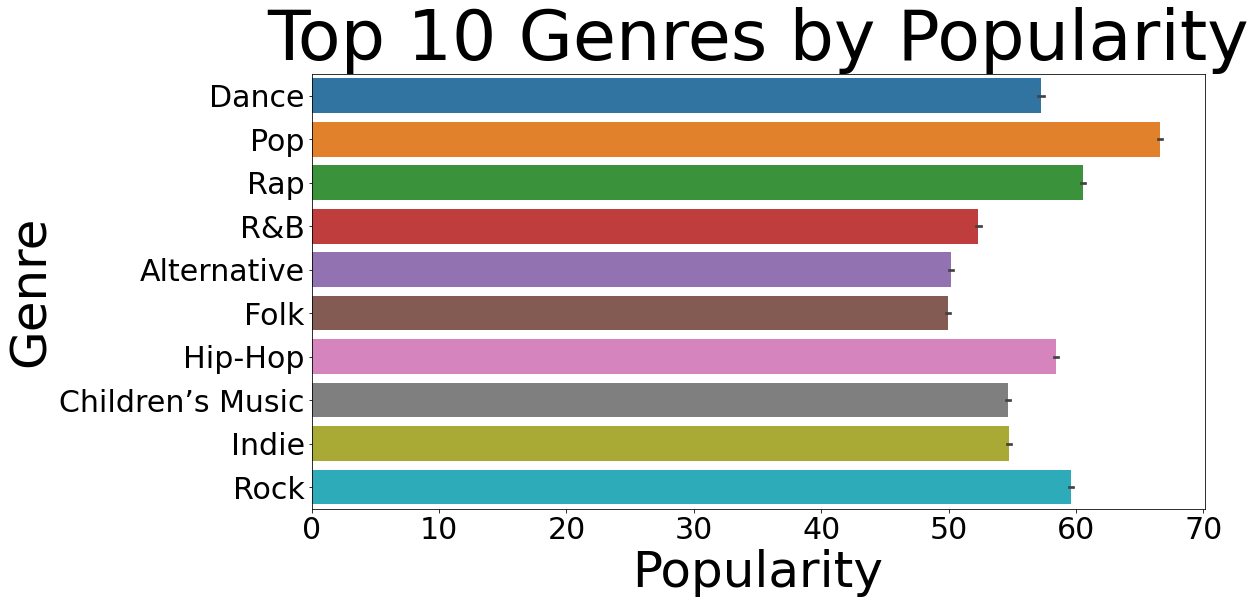

In [48]:
#Top 10 popular Genres :

plt.figure(figsize=(16, 8))
top_genres = df.groupby('genre')['popularity'].mean().nlargest(10).index
sns.barplot(x='popularity', y='genre', data=df[df['genre'].isin(top_genres)])
plt.title(f'Top {10} Genres by Popularity',fontsize=70)
plt.xlabel('Popularity',fontsize=50)
plt.ylabel('Genre',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

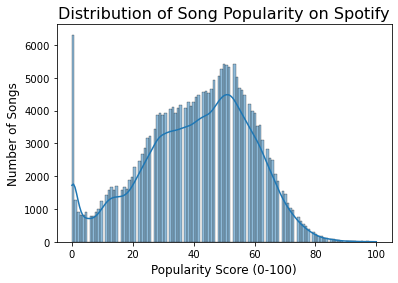

In [49]:
#Distribution of Song Popularity on Spotify :

sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Song Popularity on Spotify', fontsize=16)
plt.xlabel('Popularity Score (0-100)', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Interpretation:

The majority of tracks have moderate popularity scores.
There are very few tracks with high popularity, possibly representing hits or trending songs.

              popularity  danceability  energy  acousticness
popularity          1.00          0.26    0.25         -0.38
danceability        0.26          1.00    0.33         -0.36
energy              0.25          0.33    1.00         -0.73
acousticness       -0.38         -0.36   -0.73          1.00


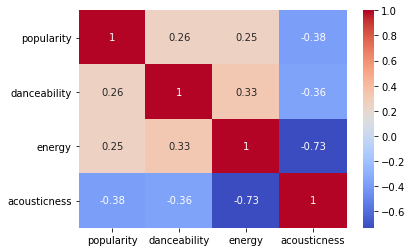

Correlation between popularity and danceability: 0.26
Correlation between popularity and energy: 0.25
Correlation between popularity and acousticness: -0.38


In [10]:
# Correlation of Populartity with danceability, energy and acousticness of the track :

correlations = df[['popularity', 'danceability', 'energy', 'acousticness']].corr()
correlations = correlations.round(2)
print(correlations)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

print("Correlation between popularity and danceability:", correlations['popularity']['danceability'])
print("Correlation between popularity and energy:", correlations['popularity']['energy'])
print("Correlation between popularity and acousticness:", correlations['popularity']['acousticness'])


* Popularity vs. Danceability: This correlation is moderate and positive (0.26), suggesting that more danceable tracks tend to be slightly more popular.
* Popularity vs. Energy: Similar to danceability, there's a weak positive correlation (0.25) between popularity and energy, indicating that higher energy tracks might be slightly more popular.
* Popularity vs. Acousticness: This correlation is negative (-0.38), implying that less acoustic tracks are generally more popular.
* Danceability vs. Energy: This is the strongest positive correlation (0.33) in the heatmap, meaning that danceable tracks generally have higher energy levels.
* Danceability vs. Acousticness: As expected, there's a strong negative correlation (-0.36) between danceability and acousticness. Highly danceable tracks tend to be less acoustic, and vice versa.
* Energy vs. Acousticness: Similar to the danceability relationship, there's a strong negative correlation (-0.73) between energy and acousticness. High-energy tracks are typically less acoustic, and vice versa.
* Playlist curation: Prioritize danceable and energetic tracks for party or workout playlists, while focusing on acoustic tracks for relaxation or mood playlists.
* Music production and acquisition: Consider creating or acquiring music with higher danceability and energy levels if targeting a broader audience.

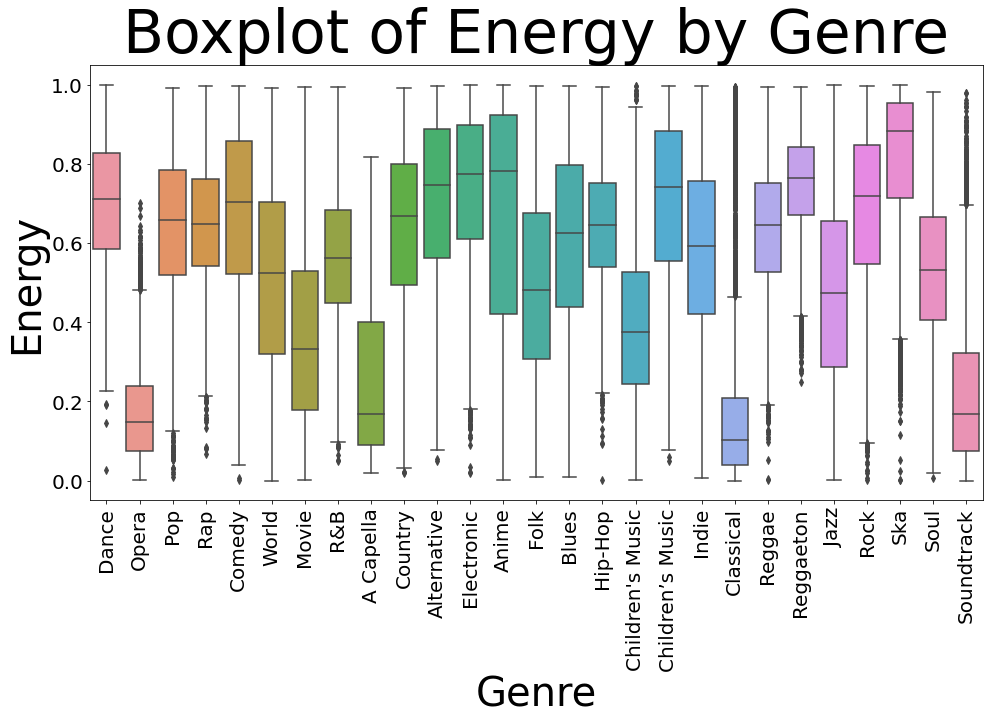

In [57]:
# Boxplot of energy by genre :

plt.figure(figsize=(16, 8))
sns.boxplot(x='genre', y='energy', data=df)
plt.title('Boxplot of Energy by Genre',fontsize=60)
plt.xlabel('Genre',fontsize=40)
plt.ylabel('Energy',fontsize=40)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=0)
plt.show()

Genres
genre
Comedy              0.853532
Hip-Hop             0.205396
Rap                 0.188186
Reggaeton           0.127616
R&B                 0.120994
Children's Music    0.117279
Reggae              0.116163
Movie               0.109400
Pop                 0.107963
Electronic          0.098988
Ska                 0.089158
Alternative         0.088783
Children’s Music    0.086489
Dance               0.083608
Soul                0.082531
Jazz                0.072304
Indie               0.066724
Anime               0.065102
Blues               0.061809
Opera               0.059720
Rock                0.053664
Classical           0.052001
Country             0.048989
World               0.045766
Folk                0.045077
Soundtrack          0.043852
A Capella           0.042414
Name: speechiness, dtype: float64


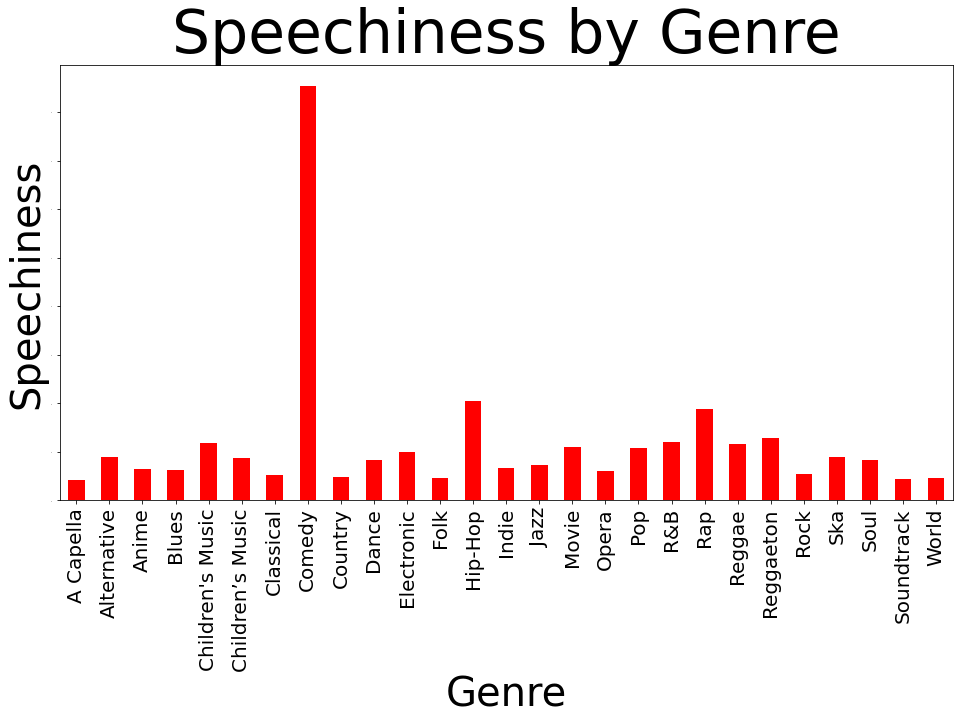

In [66]:
#Speechiness of songs by Genre :

speechiness_by_genre = df.groupby('genre')['speechiness'].mean()
print("Genres")
print(speechiness_by_genre.sort_values(ascending=False))
plt.figure(figsize=(16, 8))
speechiness_by_genre.plot(kind='bar',color='red')
plt.title('Speechiness by Genre',fontsize=60)
plt.xlabel('Genre',fontsize=40)
plt.ylabel('Speechiness',fontsize=40)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=0)
plt.show()


[Text(0.5, 1.0, 'Loudness vs Energy  Corelation')]

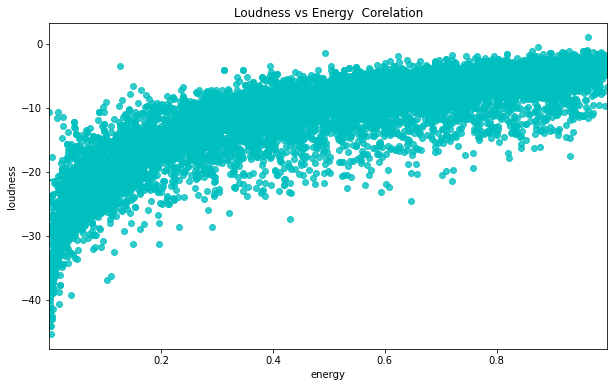

In [3]:
# Correlation of loudness and energy :

plt.figure(figsize=(10,6))
sns.regplot(data=df,y="loudness",x="energy",color="c").set(title="Loudness vs Energy  Corelation")

In [10]:
#This can be useful for creating sample datasets for analysis when the original dataset is large.

sample_df=df.sample(int(0.004*len(df)))
len(sample_df)

930

[Text(0.5, 1.0, 'Loudness vs Energy  Correlation')]

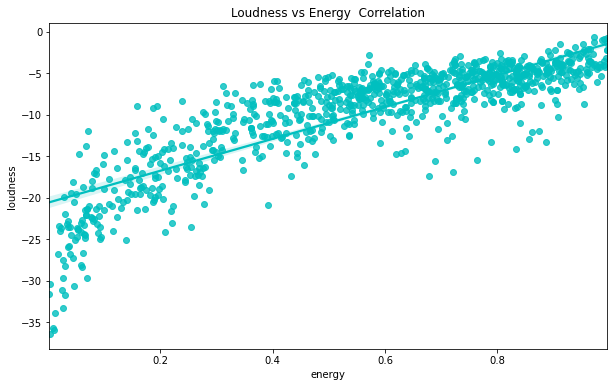

In [11]:
#Sample is taken from the dataset for better visulaisation and understanding.

plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs Energy  Correlation")
#There is positive correlation between Loudness and Energy.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Dance'),
  Text(0, 1, 'Opera'),
  Text(0, 2, 'Pop'),
  Text(0, 3, 'Rap'),
  Text(0, 4, 'Comedy'),
  Text(0, 5, 'World'),
  Text(0, 6, 'Movie'),
  Text(0, 7, 'R&B'),
  Text(0, 8, 'A Capella'),
  Text(0, 9, 'Country'),
  Text(0, 10, 'Alternative'),
  Text(0, 11, 'Electronic'),
  Text(0, 12, 'Anime'),
  Text(0, 13, 'Folk'),
  Text(0, 14, 'Blues'),
  Text(0, 15, 'Hip-Hop'),
  Text(0, 16, "Children's Music"),
  Text(0, 17, 'Children’s Music'),
  Text(0, 18, 'Indie'),
  Text(0, 19, 'Classical'),
  Text(0, 20, 'Reggae'),
  Text(0, 21, 'Reggaeton'),
  Text(0, 22, 'Jazz'),
  Text(0, 23, 'Rock'),
  Text(0, 24, 'Ska'),
  Text(0, 25, 'Soul'),
  Text(0, 26, 'Soundtrack')])

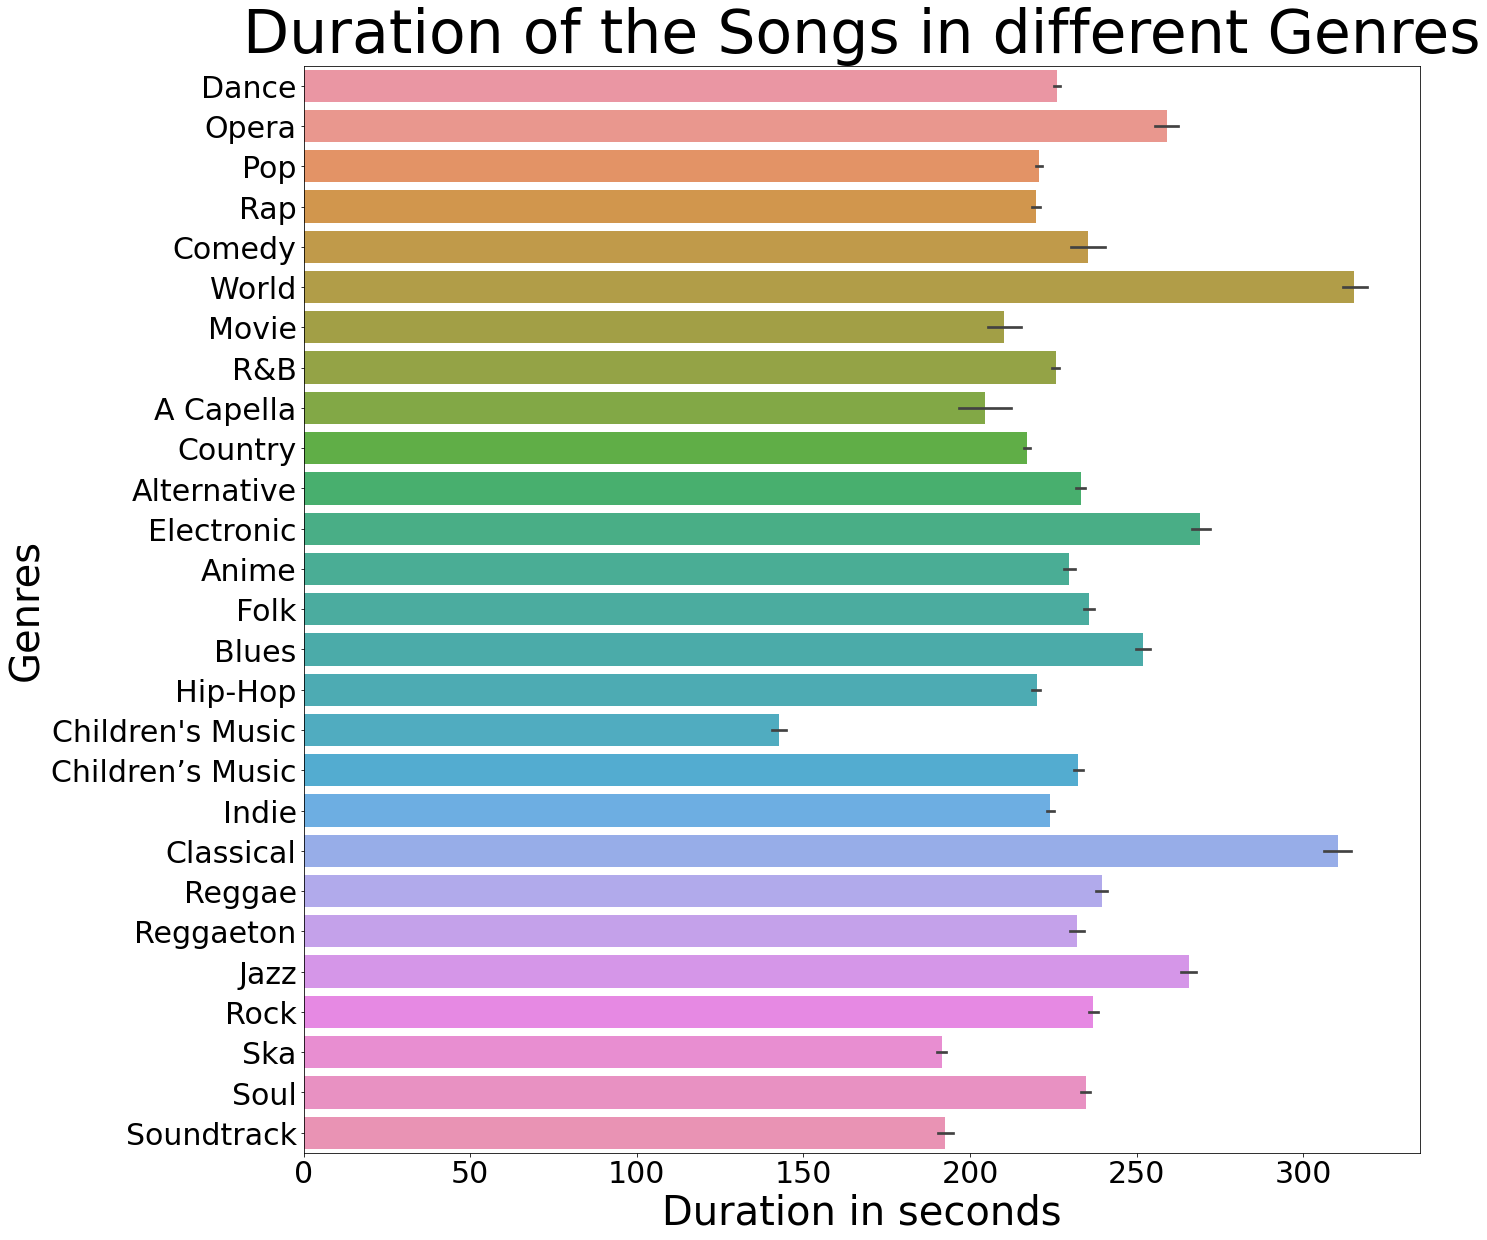

In [67]:
#Time duration of songs by Genres :

plt.figure(figsize=(20, 20)) 
plt.title("Duration of the Songs in different Genres",fontsize=60)
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y='genre',x='duration', data=df)
plt.xlabel("Duration in seconds",fontsize=40)
plt.ylabel("Genres",fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

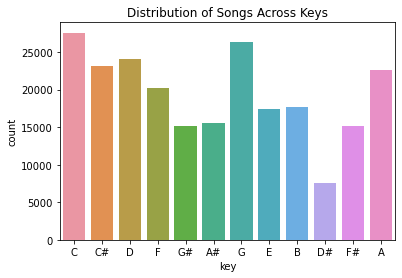

In [41]:
#Key/Pitch/nodes of the songs :

sns.countplot(x='key', data=df)
plt.title('Distribution of Songs Across Keys')
plt.show()


In [3]:
#Top 5 popular Genres and Artist

# Top Genres by Popularity
top_genres_by_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(5)
print("Top Genres by Popularity:")
print(top_genres_by_popularity)

# Top Artists by Popularity
top_artists_by_popularity = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(5)
print("\nTop Artists by Popularity:")
print(top_artists_by_popularity)




Top Genres by Popularity:
genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.271212
Name: popularity, dtype: float64

Top Artists by Popularity:
artist_name
Pedro Capó        87.0
Mario Bautista    85.0
Mau y Ricky       83.0
Ninho             82.0
Paloma Mami       82.0
Name: popularity, dtype: float64


Pop music takes the top spot for genre popularity, while Pedro Capó reigns supreme as the most popular artist. This information can be valuable for informing marketing efforts and playlist curations. For example, spotify could target Dance music fans with their marketing campaigns or create playlists featuring popular Dance tracks from artists like Pedro Capó, Mario Bautista, etc.

In [1]:
#Top Artist by "POP" genre
pop_songs = df[df["genre"] == "Pop"]

top_artist_songs = pop_songs["artist_name"].value_counts().nlargest(1).index[0]

top_artist_score = pop_songs.groupby("artist_name")["popularity"].mean().nlargest(1).index[0]

print(f"Top POP Artist (songs): {top_artist_songs}")

NameError: name 'df' is not defined